# Analysis of data from Fandango's page, which shows the bias in movies ratings

Article describing this situation - https://fivethirtyeight.com/features/fandango-movies-ratings/

Source of the data - https://github.com/fivethirtyeight/data

`all_sites_scores.csv` - contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

`fandango_scrape.csv` - contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

## Let's firstly explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [7]:
fandango = pd.read_csv("fandango_scrape.csv")

In [8]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [9]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


#### Relationship between popularity of a film and its rating.

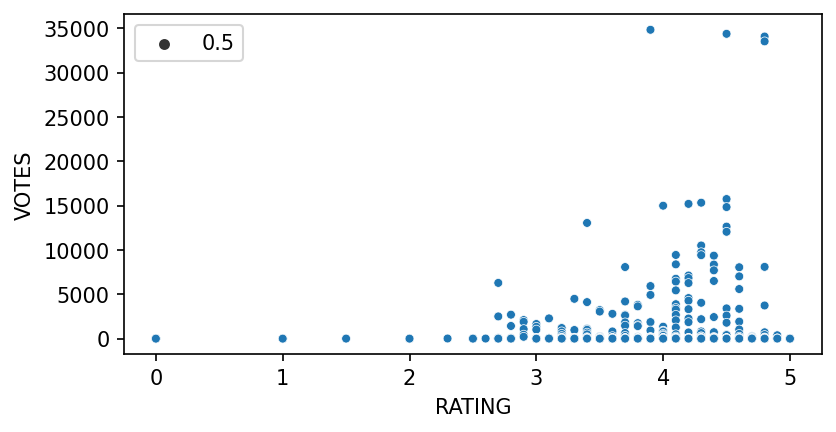

In [32]:
plt.figure(figsize=(6,3),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='VOTES',size=0.5);

In [12]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


#### Get rid of films with no votes on it.

In [13]:
fandango_with_votes = fandango[fandango['VOTES']>0]

In [14]:
fandango_with_votes.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


#### In the article we can see a suspicon that the true user rating can be slightly different than the raiting shown to a user. We have to visualize that.

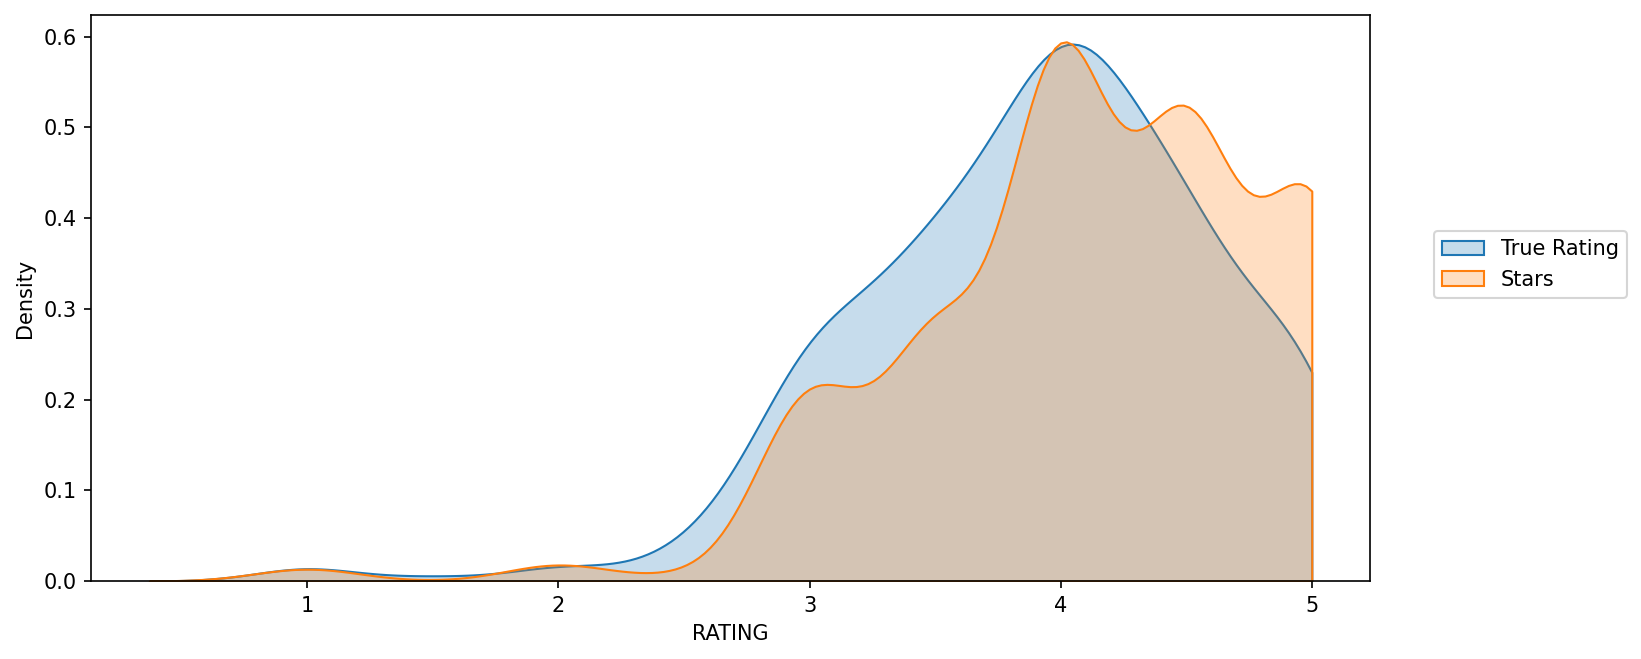

In [33]:
plt.figure(figsize=(11,5),dpi=150)

sns.kdeplot(data=fandango_with_votes,x='RATING',clip=[0,5],shade=True,label='True Rating')
sns.kdeplot(data=fandango_with_votes,x='STARS',clip=[0,5],shade=True,label='Stars')

plt.legend(loc=(1.05,0.5));

#### Let's see an actual difference between STARS and RATING.

In [23]:
import warnings
warnings.filterwarnings('ignore')

fandango_with_votes['STARS_DIFF'] = fandango_with_votes['STARS'] - fandango_with_votes['RATING']
fandango_with_votes['STARS_DIFF'] = fandango_with_votes['STARS_DIFF'].round(2)

In [24]:
fandango_with_votes

,FILM,STARS,RATING,VOTES,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
1,Jurassic World (2015),4.5,4.5,34390,0.0
2,American Sniper (2015),5.0,4.8,34085,0.2
3,Furious 7 (2015),5.0,4.8,33538,0.2
4,Inside Out (2015),4.5,4.5,15749,0.0
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,0.0
431,The Intern (2015),5.0,5.0,1,0.0
432,The Park Bench (2015),5.0,5.0,1,0.0
433,The Wanted 18 (2015),5.0,5.0,1,0.0


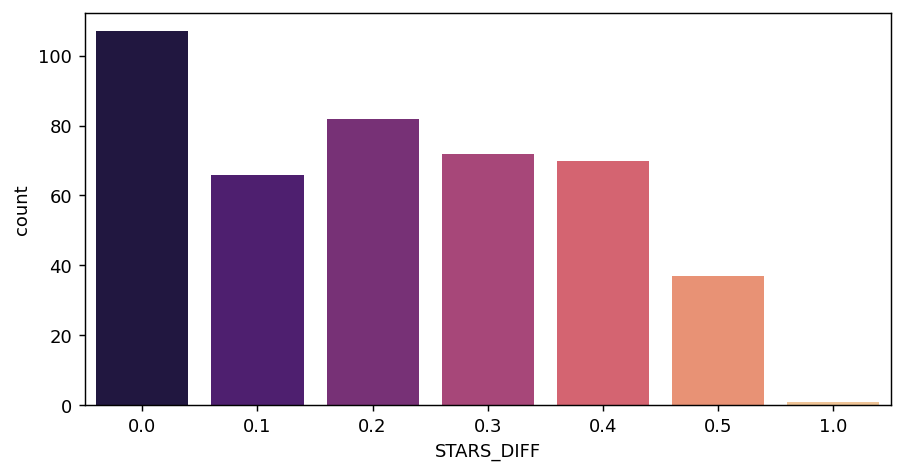

In [30]:
plt.figure(figsize=(8,4),dpi=130)
sns.countplot(data=fandango_with_votes,x='STARS_DIFF',palette='magma');

#### Check the film with 1 point difference in STARS_DIFF.

In [31]:
fandango_with_votes[fandango_with_votes['STARS_DIFF'] == 1.0]

,FILM,STARS,RATING,VOTES,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,1.0


## Comparison of Fandango Ratings to Other Sites.

In [148]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [149]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [150]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [151]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


#### Rotten Tomatoes

RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews.
<br>Relationship between RT Critic reviews and RT User reviews.

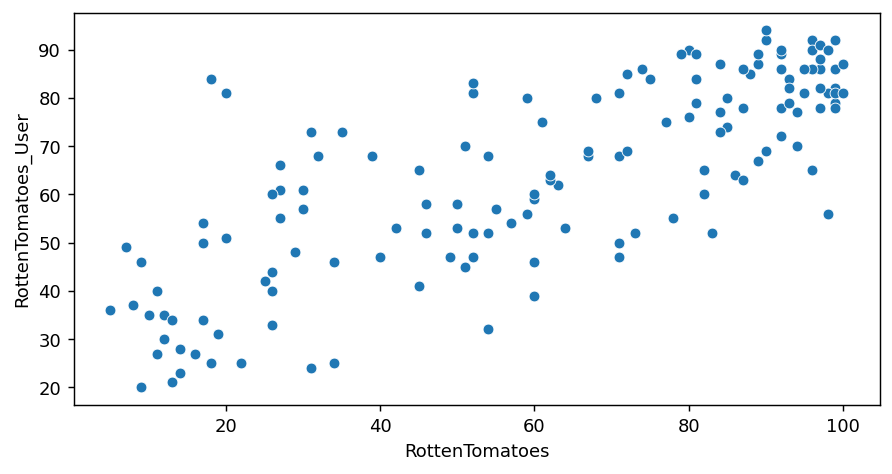

In [152]:
plt.figure(figsize=(8,4),dpi=130)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User');

Let's calculate this difference by comparing the critics ratings and the RT User ratings.

In [153]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [154]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Mean Absolute Difference between RT scores and RT User scores.

In [155]:
def pos(diff):
    if diff < 0:
        return diff * -1
    else:
        return diff

In [156]:
all_sites['Rotten_Diff'].apply(pos).mean()

15.095890410958905

Distribution of the differences between RT Critics Score and RT User Score.

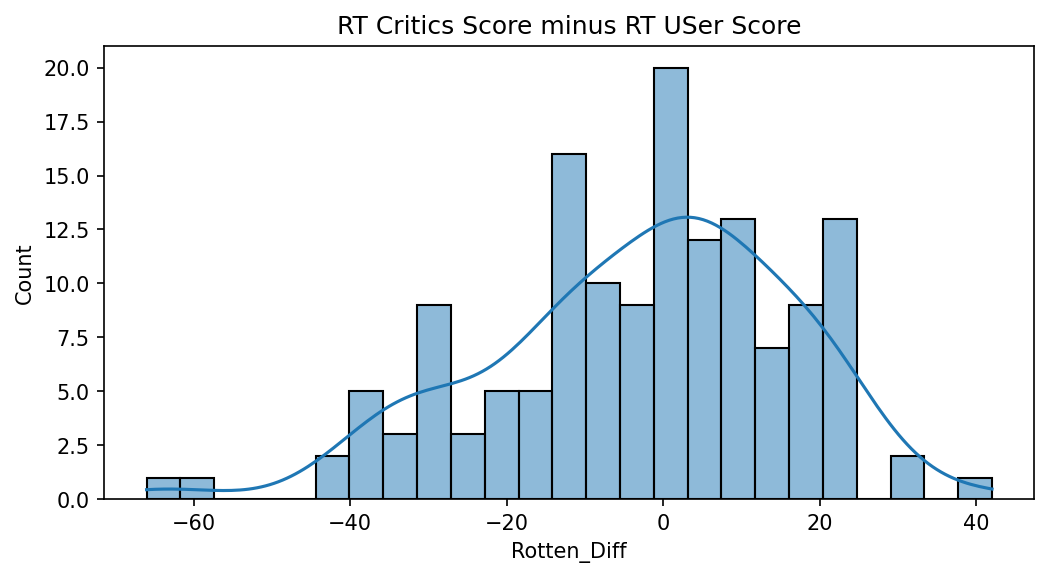

In [157]:
plt.figure(figsize=(8,4),dpi=150)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)
plt.title("RT Critics Score minus RT USer Score");

Distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.

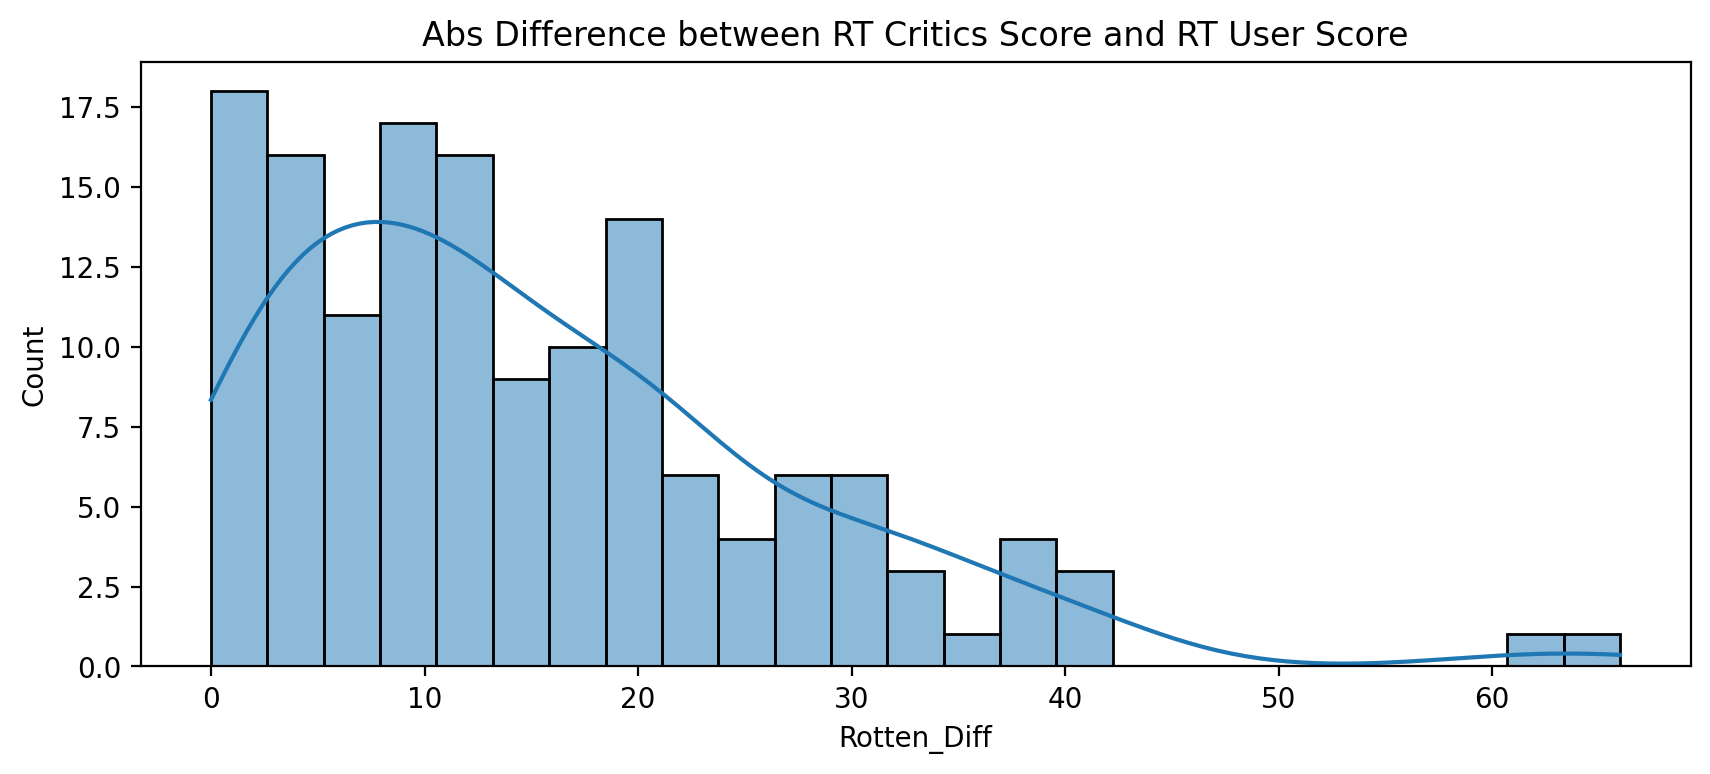

In [158]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)
plt.title("Abs Difference between RT Critics Score and RT User Score");

Movies with largest neagtive differences.

In [85]:
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


Movies with largest positive differences.

In [86]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


#### MetaCritics

There is also an average user rating vs official displayed rating.

In [87]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


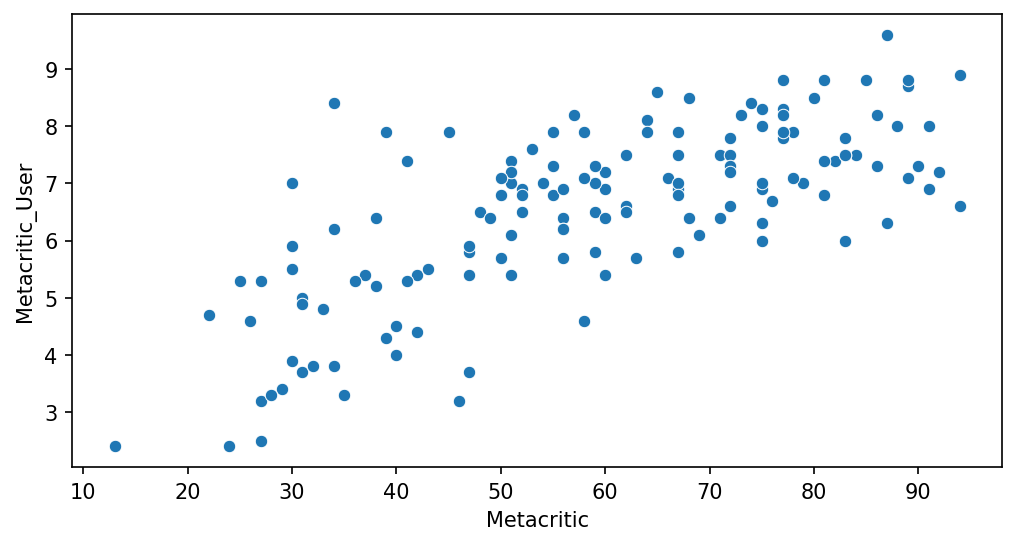

In [90]:
plt.figure(figsize=(8,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User');

####  IMDB

Both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

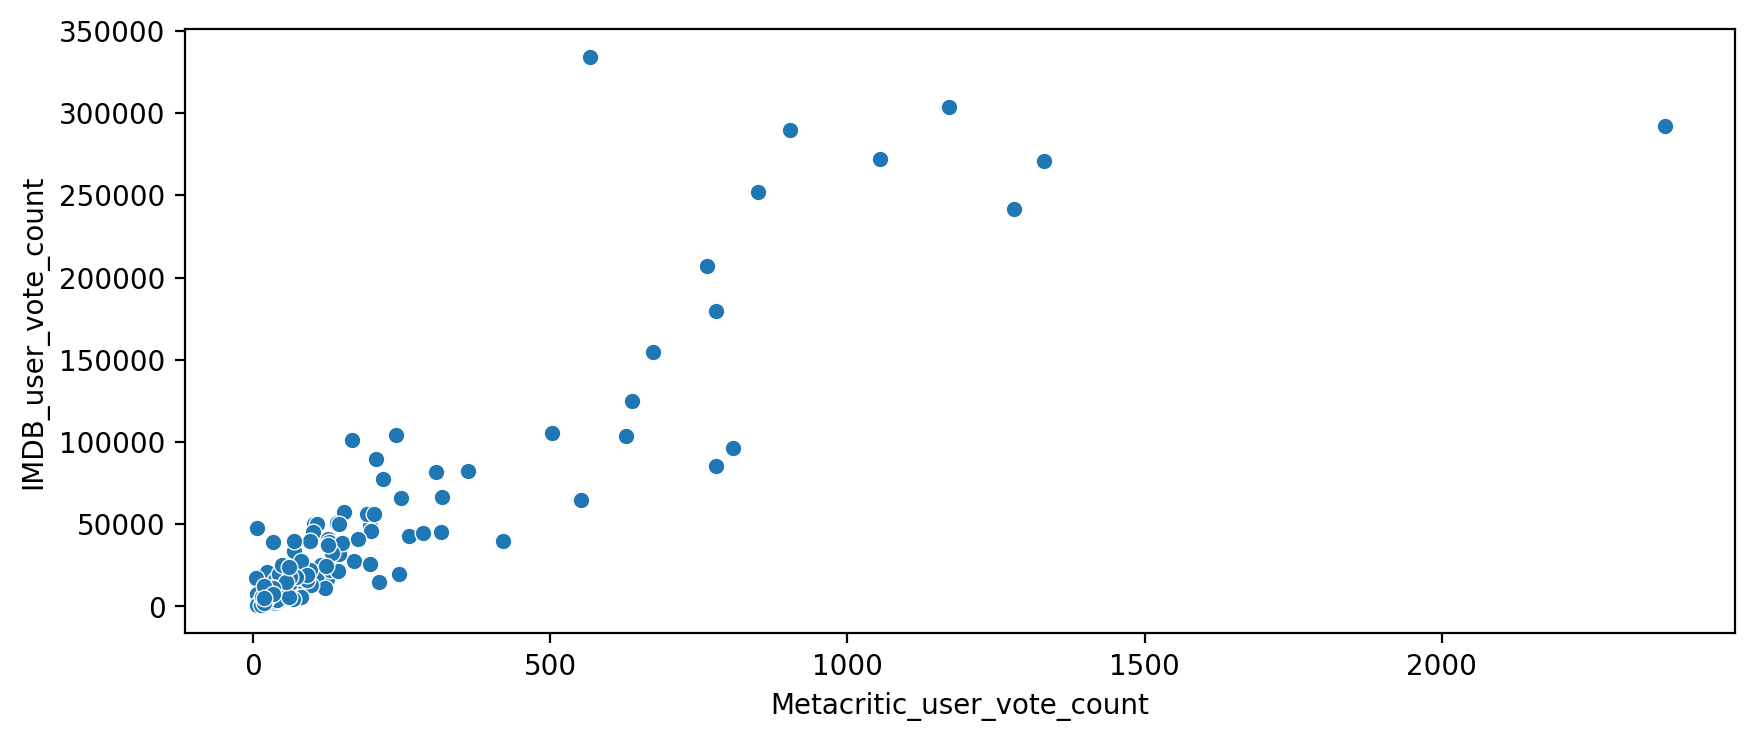

In [93]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count');

What is the movie with highest vote count on IMDB and only 500 Metacritic ratings?

In [94]:
all_sites.sort_values('IMDB_user_vote_count',ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


What movie has the highest Metacritic User Vote count?

In [95]:
all_sites.nlargest(1,columns=['Metacritic_user_vote_count'])

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandango Scores vs All Sites

In [96]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   RottenTomatoes              145 non-null    int64  
 5   RottenTomatoes_User         145 non-null    int64  
 6   Metacritic                  145 non-null    int64  
 7   Metacritic_User             145 non-null    float64
 8   IMDB                        145 non-null    float64
 9   Metacritic_user_vote_count  145 non-null    int64  
 10  IMDB_user_vote_count        145 non-null    int64  
 11  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 14.7+ KB


In [98]:
df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8


We have to normalize values in RT, Metacritics and IMDB.

In [99]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [100]:
df.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


Let's take important columns.

In [101]:
norm_scorses = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [102]:
norm_scorses.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


#### Comparing the distributions of normalized rating across all sites.

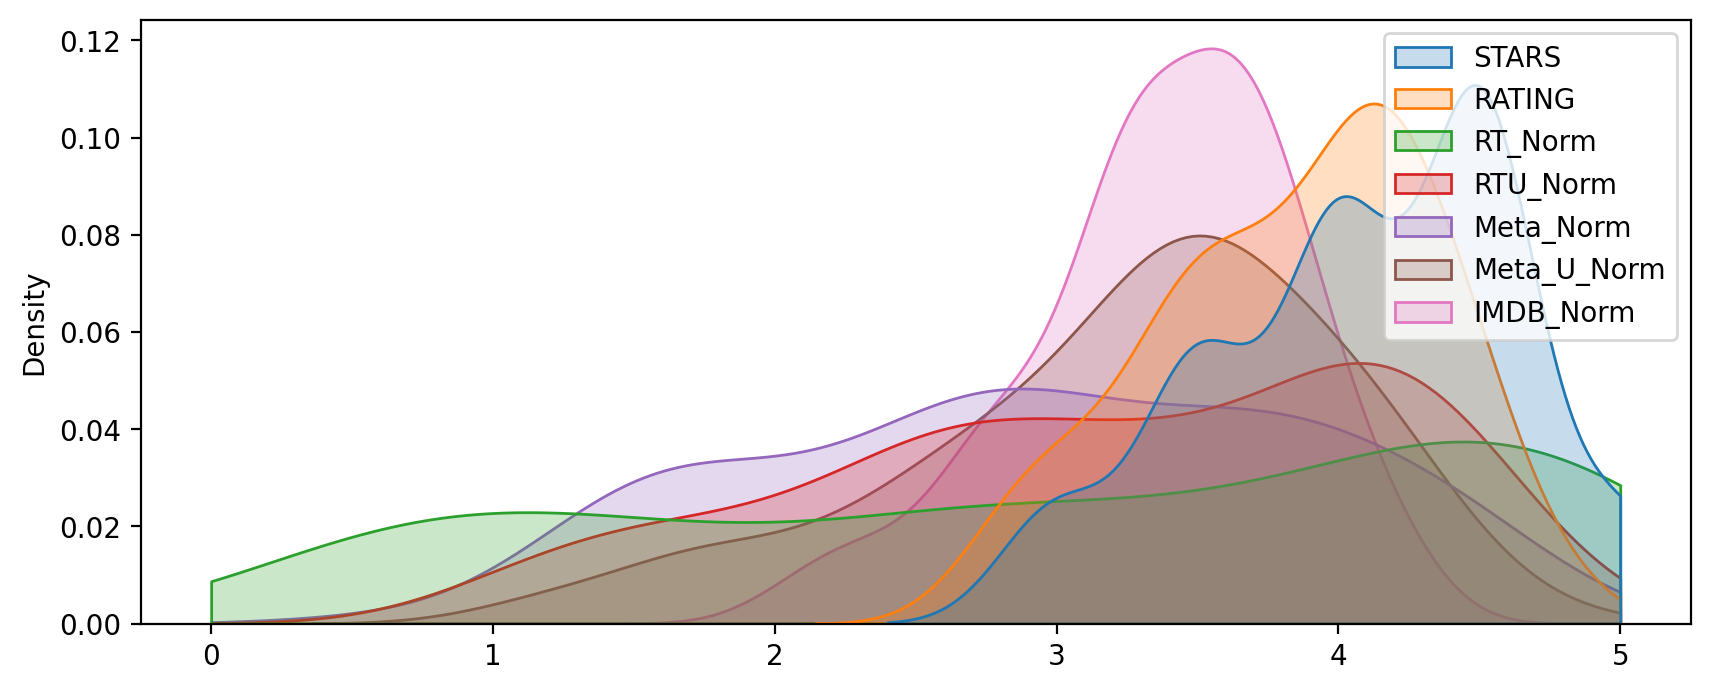

In [134]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=norm_scorses,shade=True,clip=[0,5]);

Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.

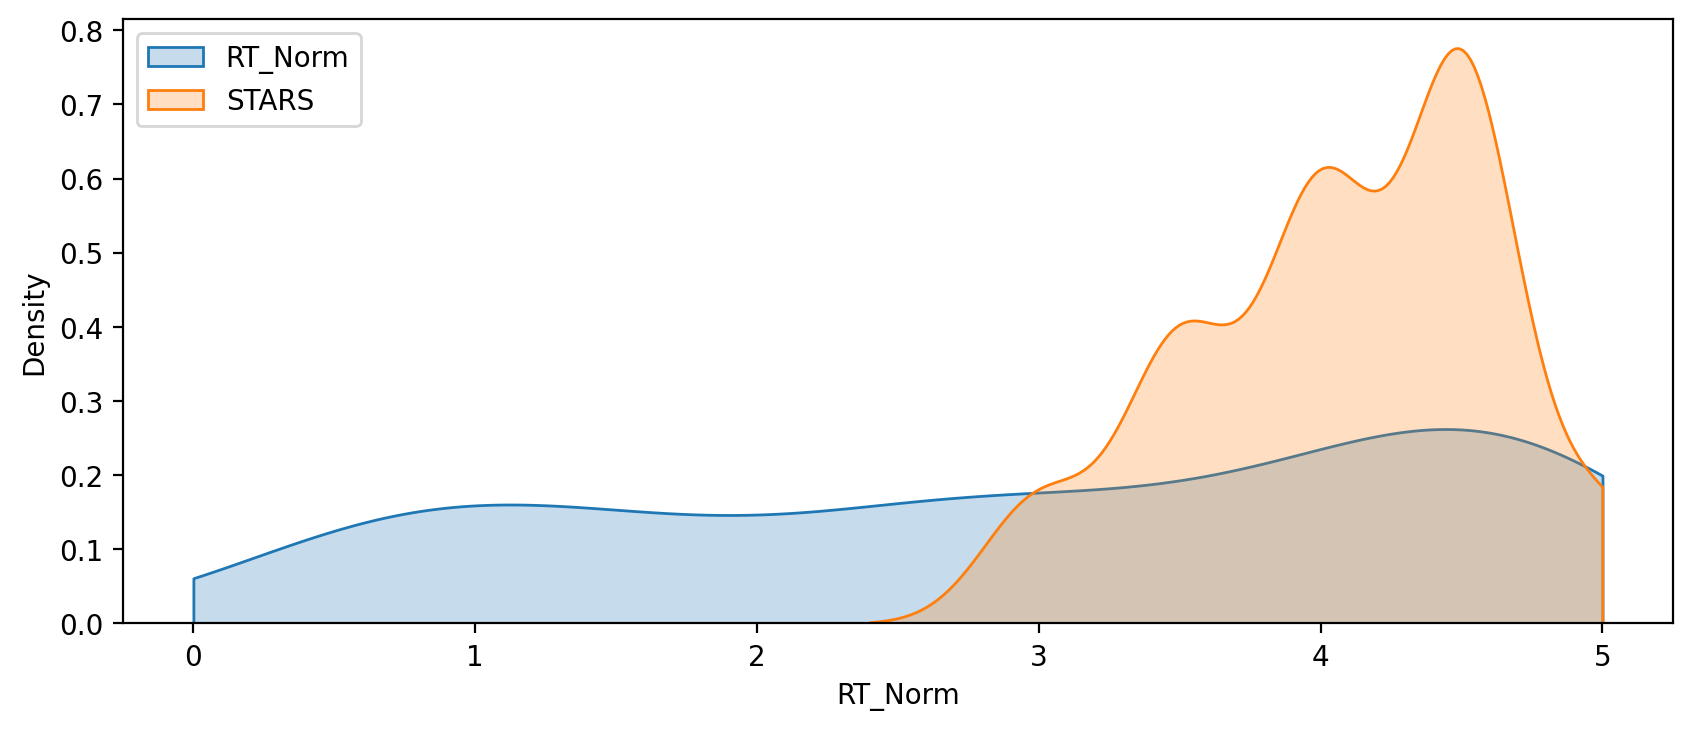

In [132]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=norm_scorses,x='RT_Norm',shade=True,clip=[0,5],label='RT_Norm')
sns.kdeplot(data=norm_scorses,x='STARS',shade=True,clip=[0,5],label='STARS')
plt.legend(loc=2);

Histplot comparing all normalized scores.

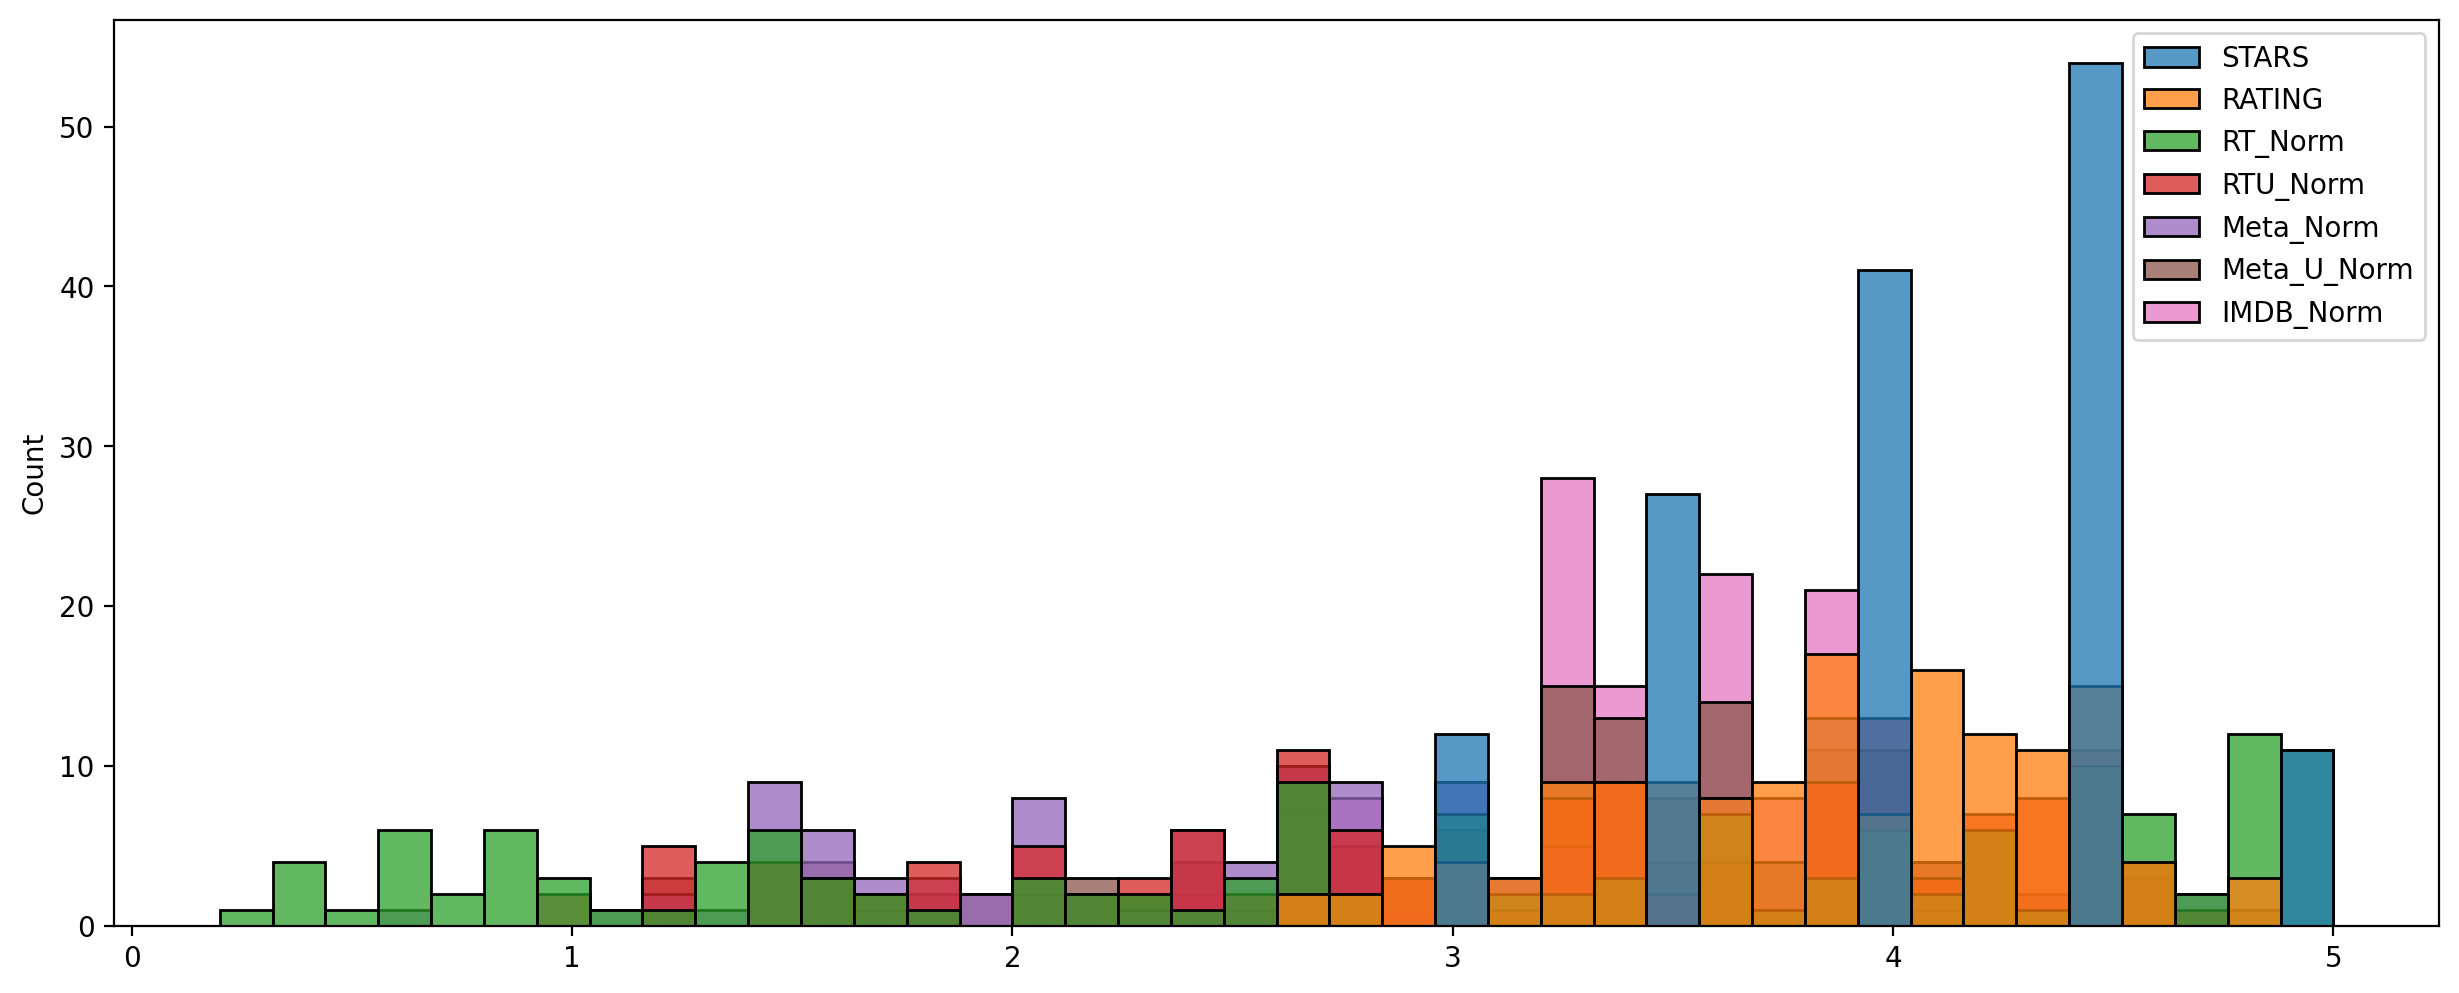

In [139]:
plt.figure(figsize=(15,6),dpi=200)
sns.histplot(data=norm_scorses,bins=40);

#### Clearly Fandango is rating movies much higher than other sites. Let's examine the top 10 worst movies, based off the Rotten Tomatoes Critic Ratings

In [140]:
final = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [141]:
final.nsmallest(n=10,columns=['RT_Norm'])

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Distribution of ratings across all sites for the top 10 worst movies.

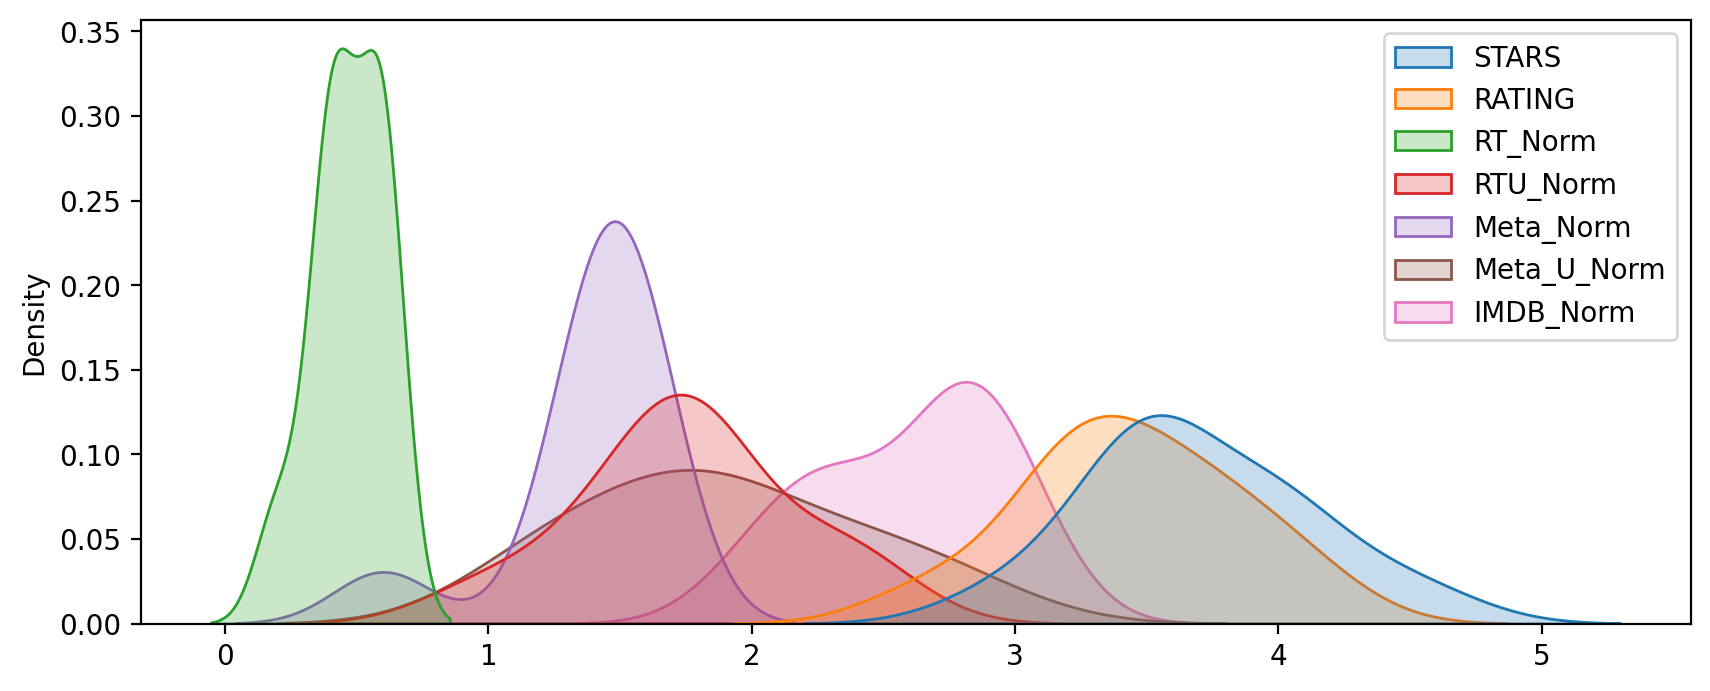

In [142]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=final.nsmallest(n=10,columns=['RT_Norm']),shade=True);

## Conclusion - Fandango is showing around 3-4 star ratings for films that are clearly bad. Biggest offender is `Taken 3`. Fandango is displaying 4.5 stars on their site for a film with an 1.86 across the other platfroms.

In [146]:
final.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [147]:
final.iloc[25]['STARS']

4.5

In [145]:
(0.4+2.3+1.3+2.3+3)/5

1.86